In [1]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sb

In [30]:
df = pd.read_csv('results.csv')

In [32]:
df.columns

Index(['workload', 'op', 'fs', 'time'], dtype='object')

In [33]:
# convert from %H:%M:%S strings to num. seconds
df['time'] = df['time'].apply(lambda x: (int(x.split(':')[0]) * 360) + (int(x.split(':')[1]) * 60) + float(x.split(':')[2]) )

In [41]:
gb = df.groupby(['workload','fs'])

# get the sum of copy/exec operations for in-memory filesystems
sums = gb['time'].sum()

# flatten the index
sums = sums.reset_index()

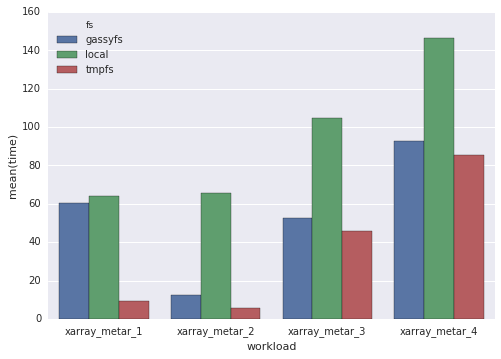

In [52]:
sb_plot = sb.barplot(x="workload", y="time", hue="fs", data=sums)

In [54]:
# generate png file
sb_plot.get_figure().savefig('results.png', bbox_inches='tight', dpi=300)